In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ppiech/openaigym/spinningup

In [21]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/v2.1-3-mountaincar/v2.1-3_mountaincar-v0/v2.1-3_mountaincar-v0_s10/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/v2.1-3-mountaincar/v2.1-3_mountaincar-v0/v2.1-3_mountaincar-v0_s10/



,Epoch,AverageEpRet,StdEpRet,EpLen,TotalEnvInteracts,StopIter - Goals2,LossPi - Goals2,LossValue - Goals2,AdvantageMean - Goals2,VVals - Goals2,...,AdvantageMean - Actions,VVals - Actions,Entropy - Actions,StabilityReward - Actions,LossActionInverse - Actions,LossGoalInverse - Actions,Unit,Condition1,Condition2,Performance
0,0,-200.0,0.0,200.0,2000,79.0,-4.386902e-08,92.313390,-7.603706,-0.040357,...,-1.178611,0.151598,1.091908,0.498192,0.235753,0.234498,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
1,1,-200.0,0.0,200.0,4000,79.0,1.659393e-07,48.818634,-5.486845,-2.704679,...,-0.515458,-0.513116,1.088694,0.498724,0.226682,0.215058,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
2,2,-200.0,0.0,200.0,6000,79.0,1.144409e-08,3.461489,-0.986768,-8.359716,...,-0.492335,-0.533593,1.090652,0.500382,0.221196,0.190173,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
3,3,-200.0,0.0,200.0,8000,79.0,4.768372e-09,2.202066,-0.035197,-9.555305,...,-0.487832,-0.531689,1.068475,0.502786,0.218597,0.161222,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
4,4,-200.0,0.0,200.0,10000,79.0,-3.814697e-09,1.945689,-0.073368,-9.507746,...,-0.479625,-0.526810,1.000796,0.512091,0.215864,0.131653,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
5,5,-200.0,0.0,200.0,12000,78.0,3.814697e-09,1.987783,-0.044120,-9.544309,...,-0.463048,-0.526660,0.913678,0.519530,0.212551,0.105058,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
6,6,-200.0,0.0,200.0,14000,79.0,2.861023e-09,1.953383,-0.046066,-9.541379,...,-0.468632,-0.515535,0.803987,0.523661,0.208389,0.083570,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
7,7,-200.0,0.0,200.0,16000,41.0,1.907349e-09,1.892456,-0.044225,-9.543467,...,-0.474377,-0.512764,0.715807,0.525833,0.201706,0.067742,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
8,8,-200.0,0.0,200.0,18000,43.0,9.536743e-09,1.915183,-0.022841,-9.570359,...,-0.485492,-0.527074,0.655898,0.521266,0.196487,0.056651,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0
9,9,-200.0,0.0,200.0,20000,71.0,3.814697e-09,1.924699,-0.037500,-9.551632,...,-0.467110,-0.543253,0.631973,0.526323,0.193572,0.049148,3,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-3,-200.0


In [22]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch,goal_octaves
0,v2.1-3_mountaincar-v0,2000,5


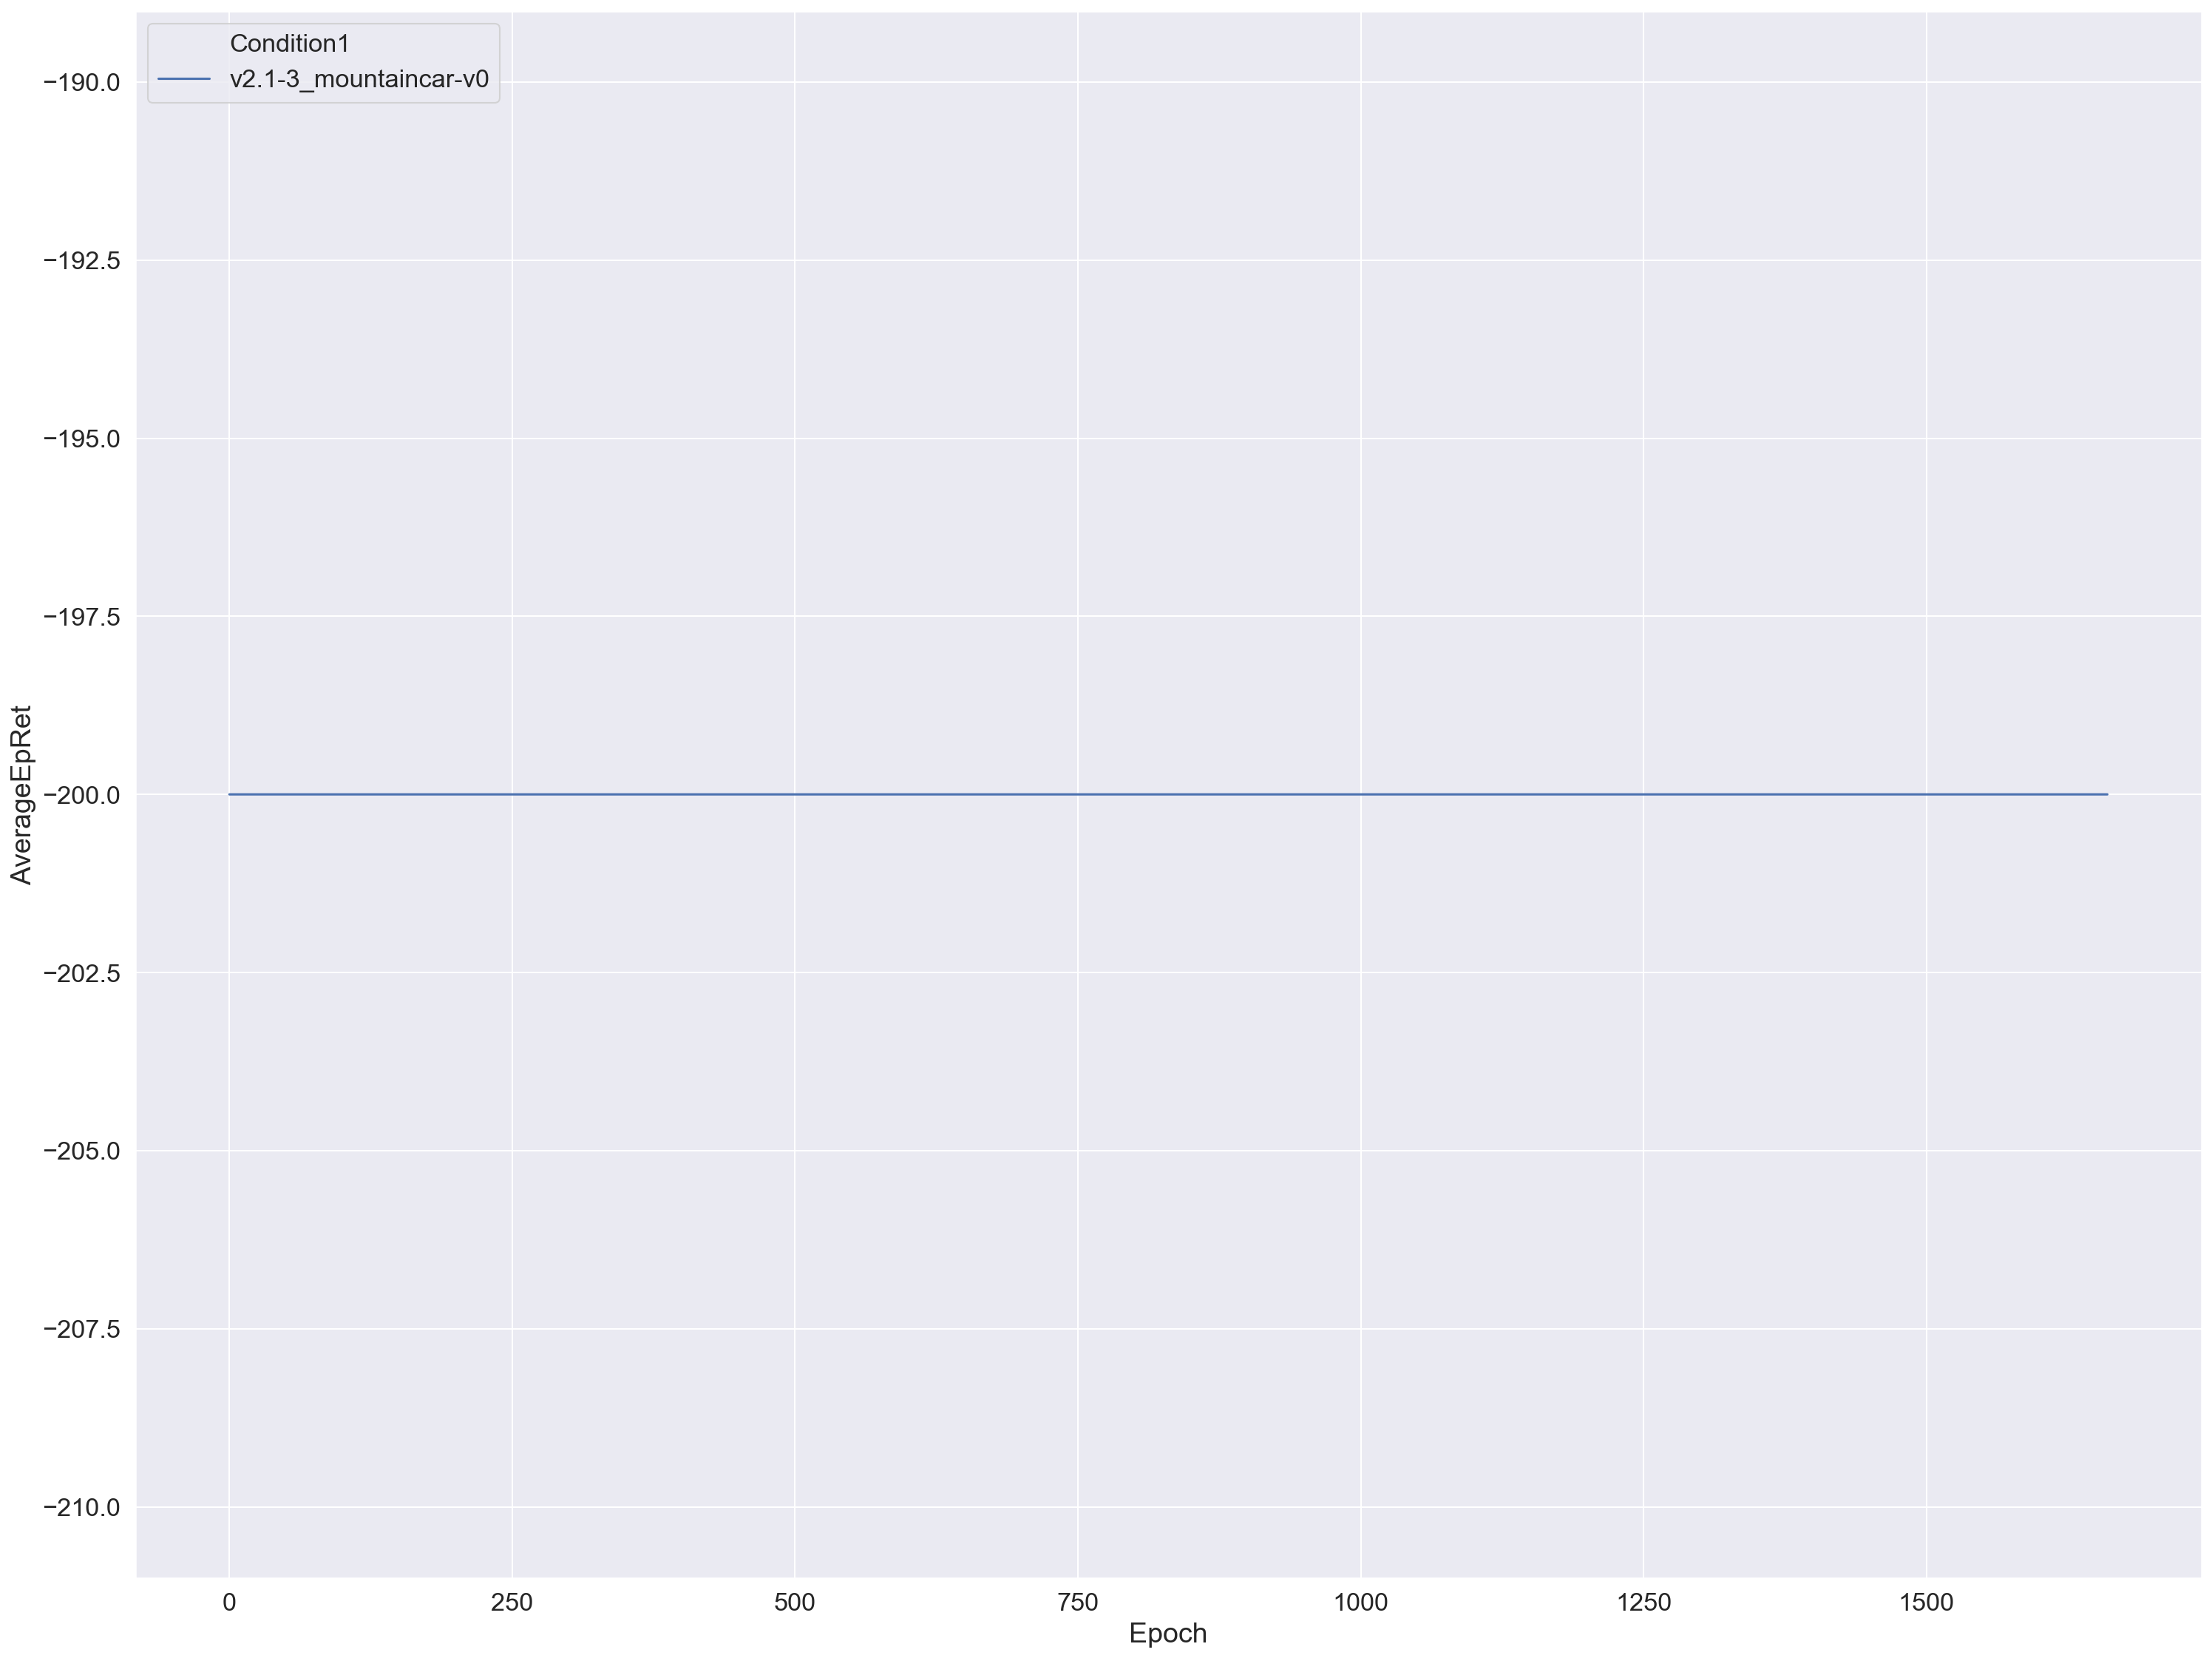

In [23]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, units='Condition2', estimator=None)
plt.show()

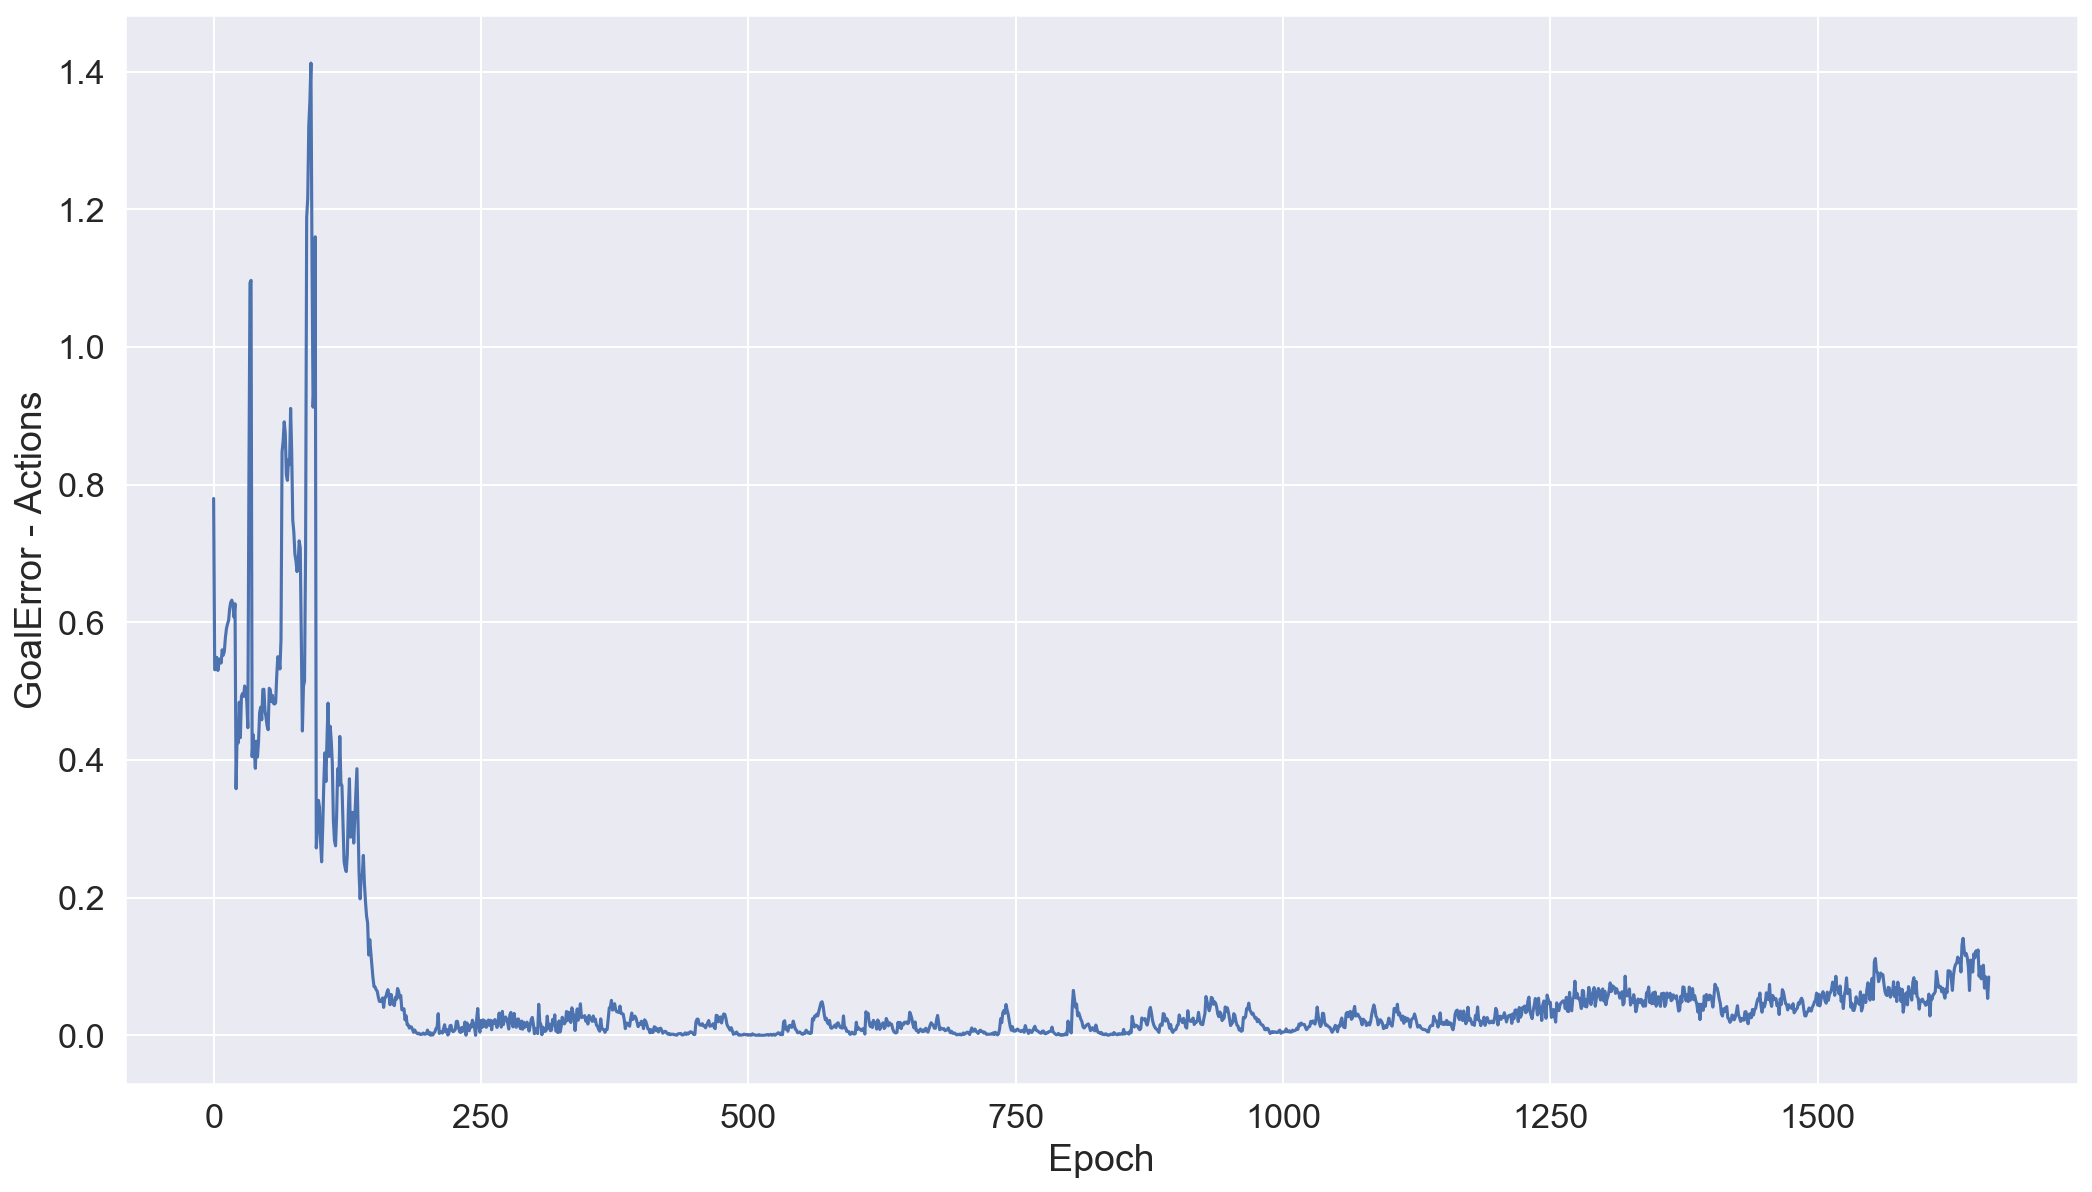

In [24]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalError - Actions', smooth=1, show_legend=False, estimator='mean')
plt.show()

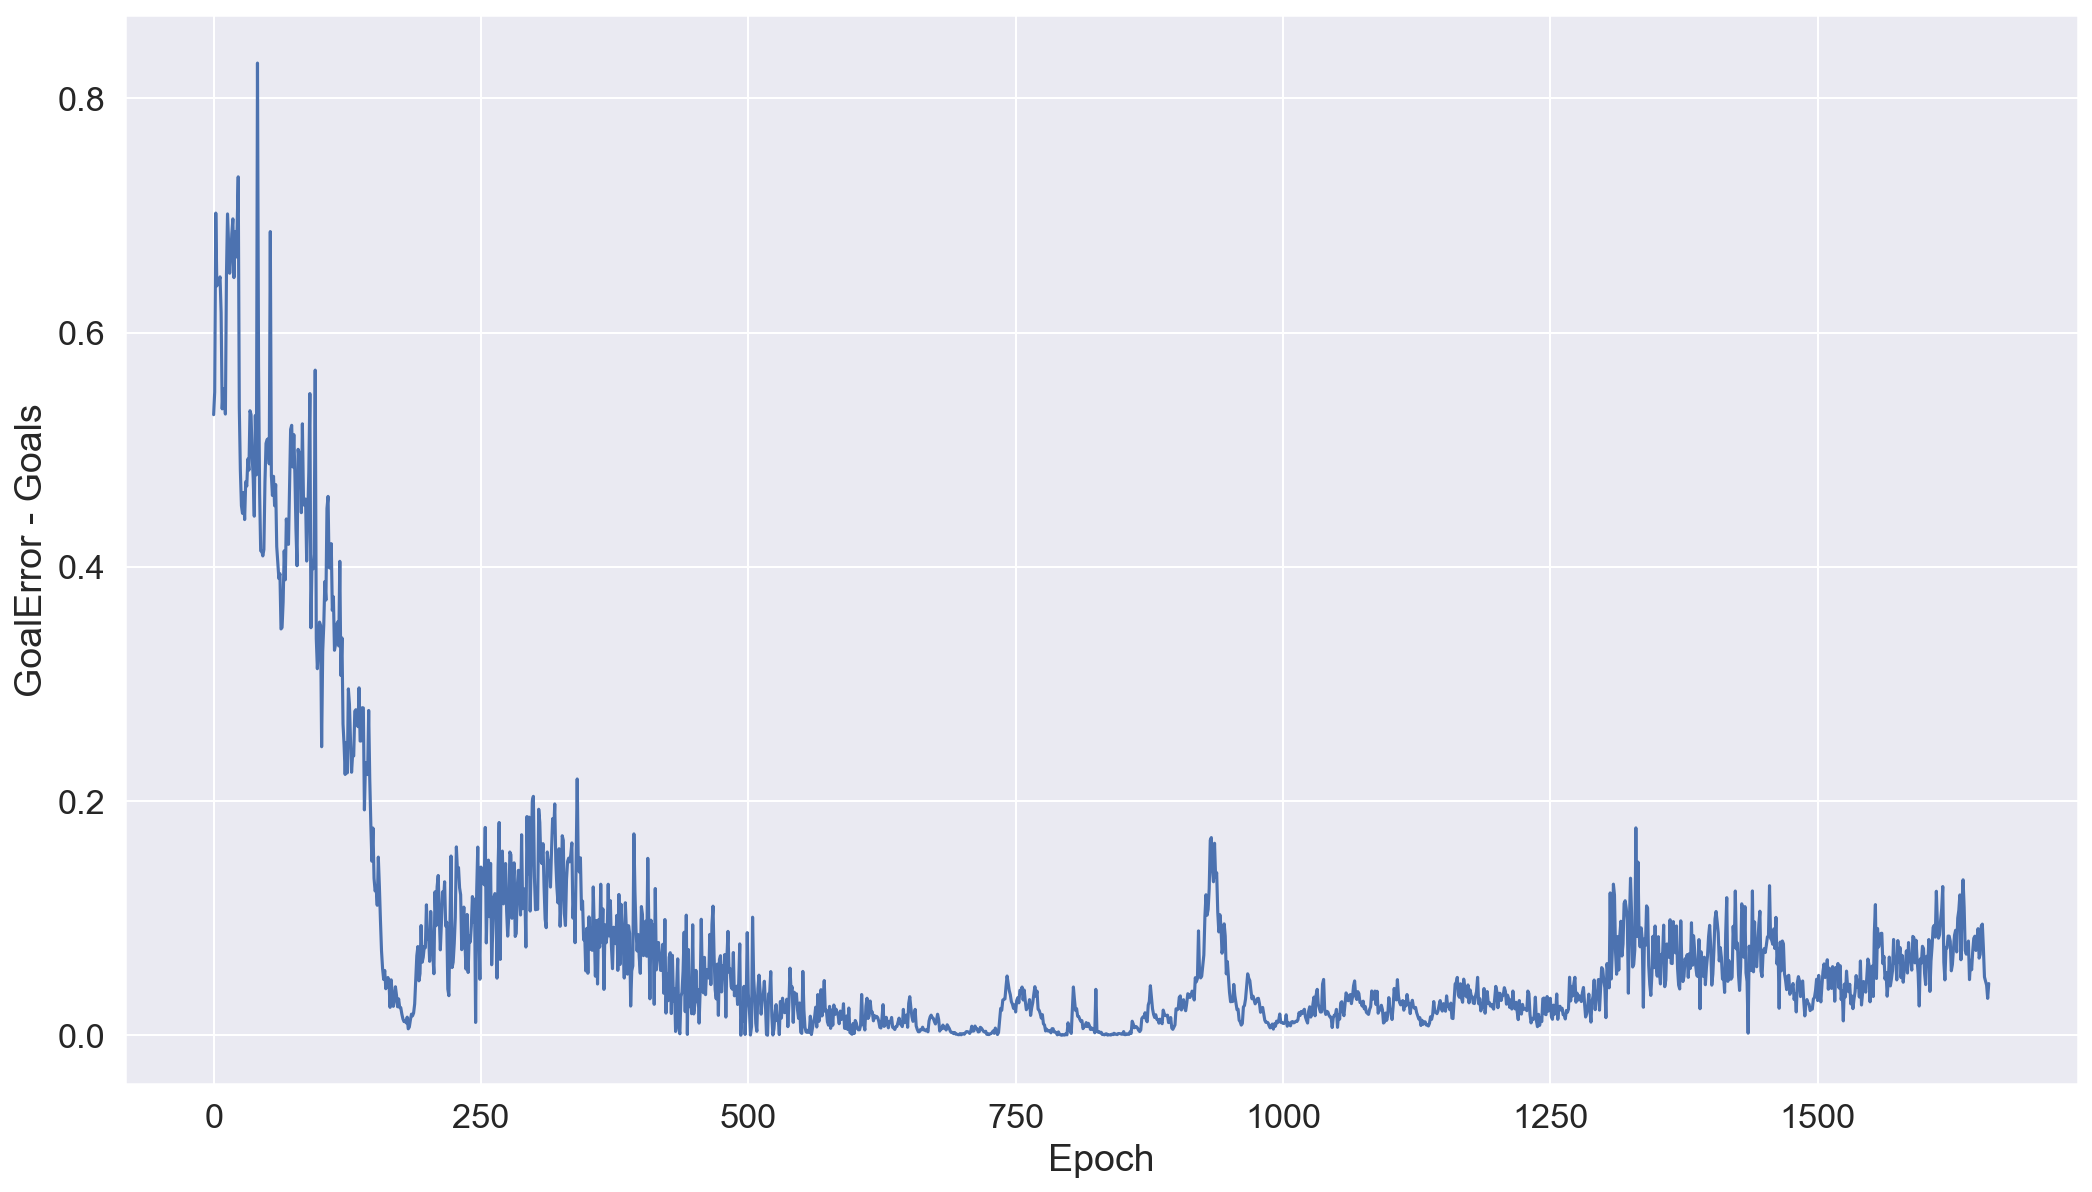

In [25]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalError - Goals', smooth=1, show_legend=False, estimator='mean')
plt.show()

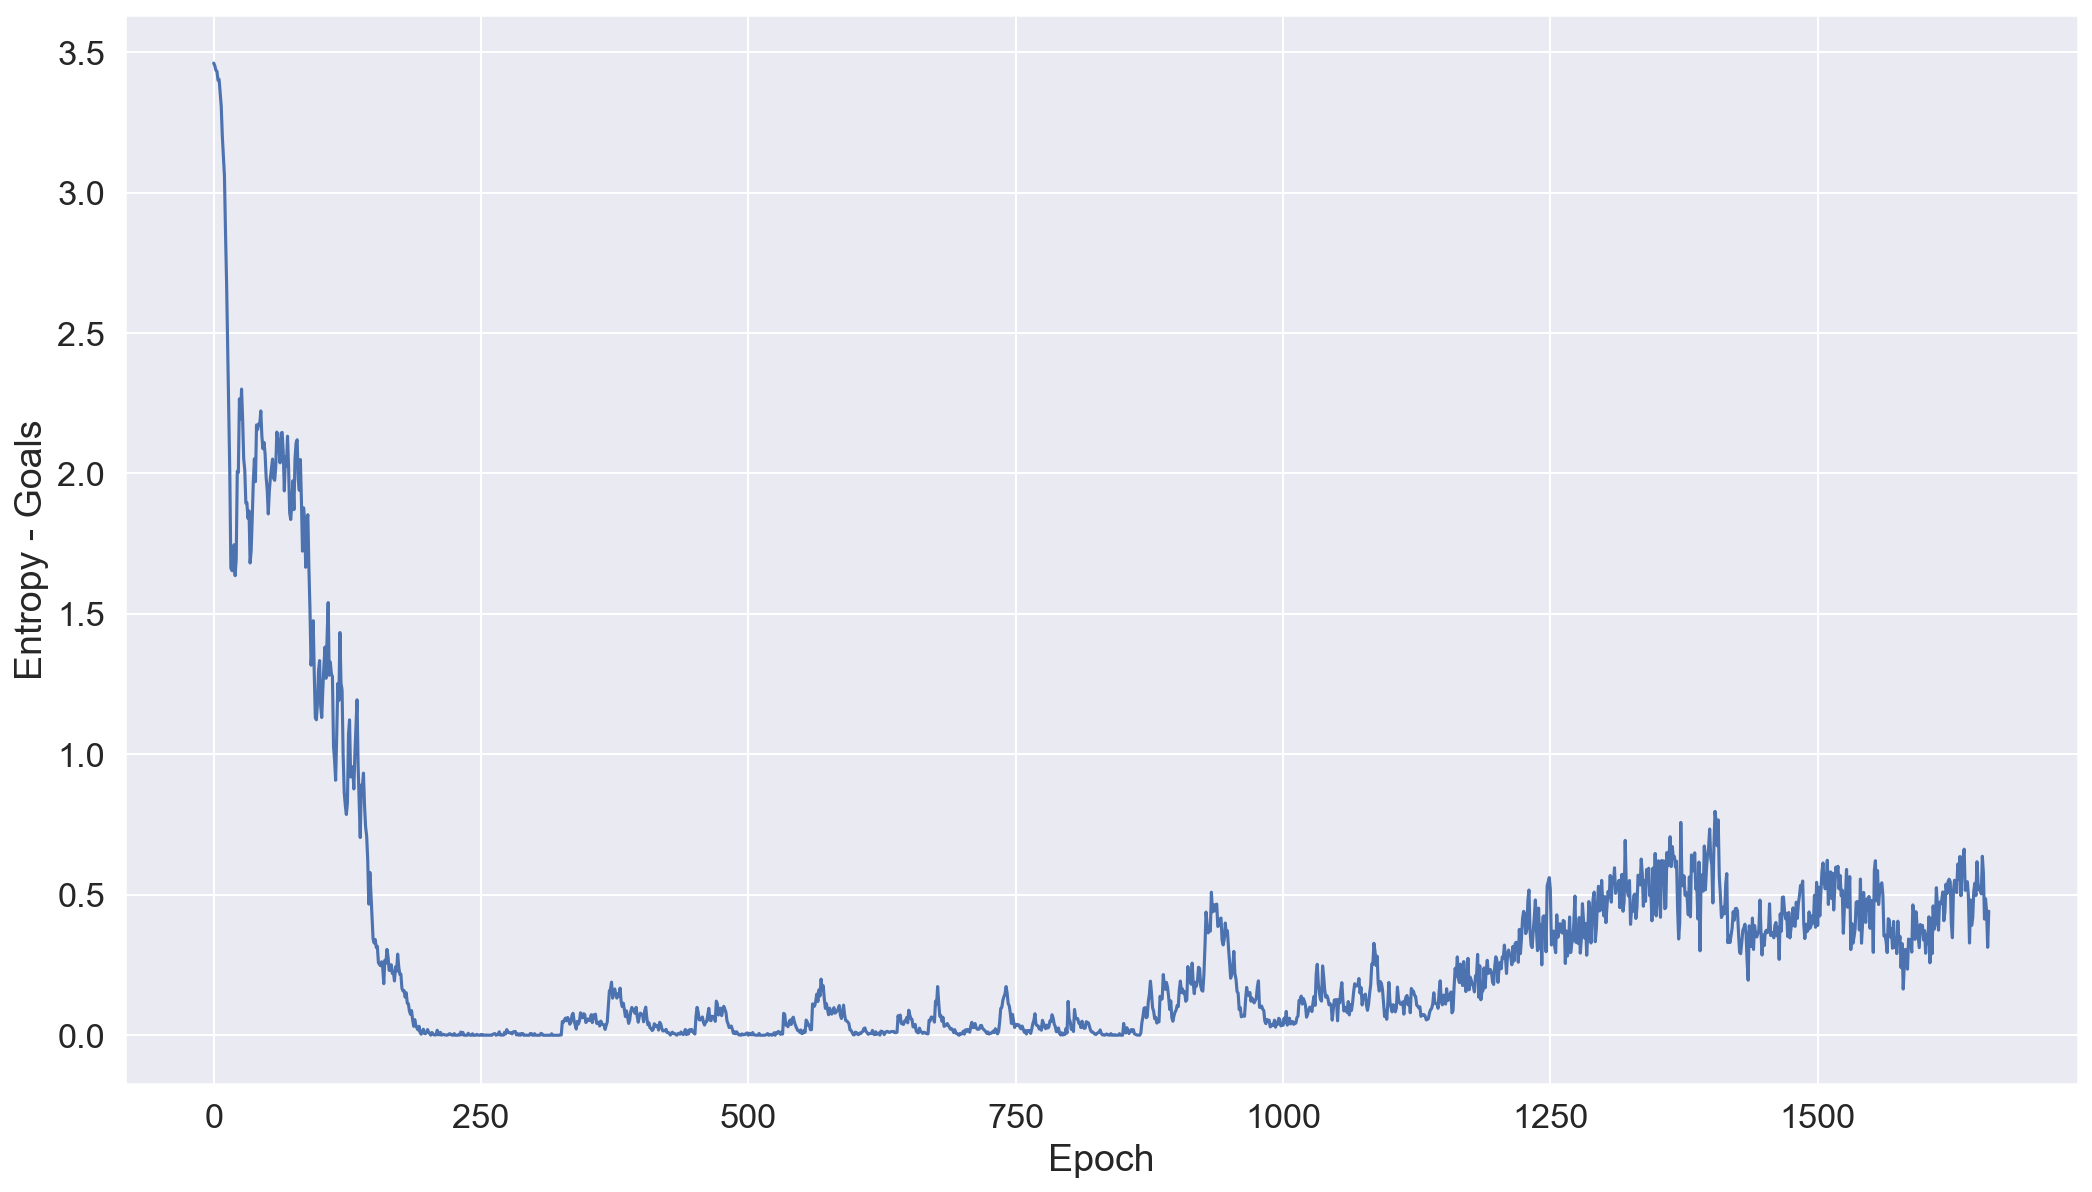

In [26]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='Entropy - Goals', smooth=1, show_legend=False)
plt.show()

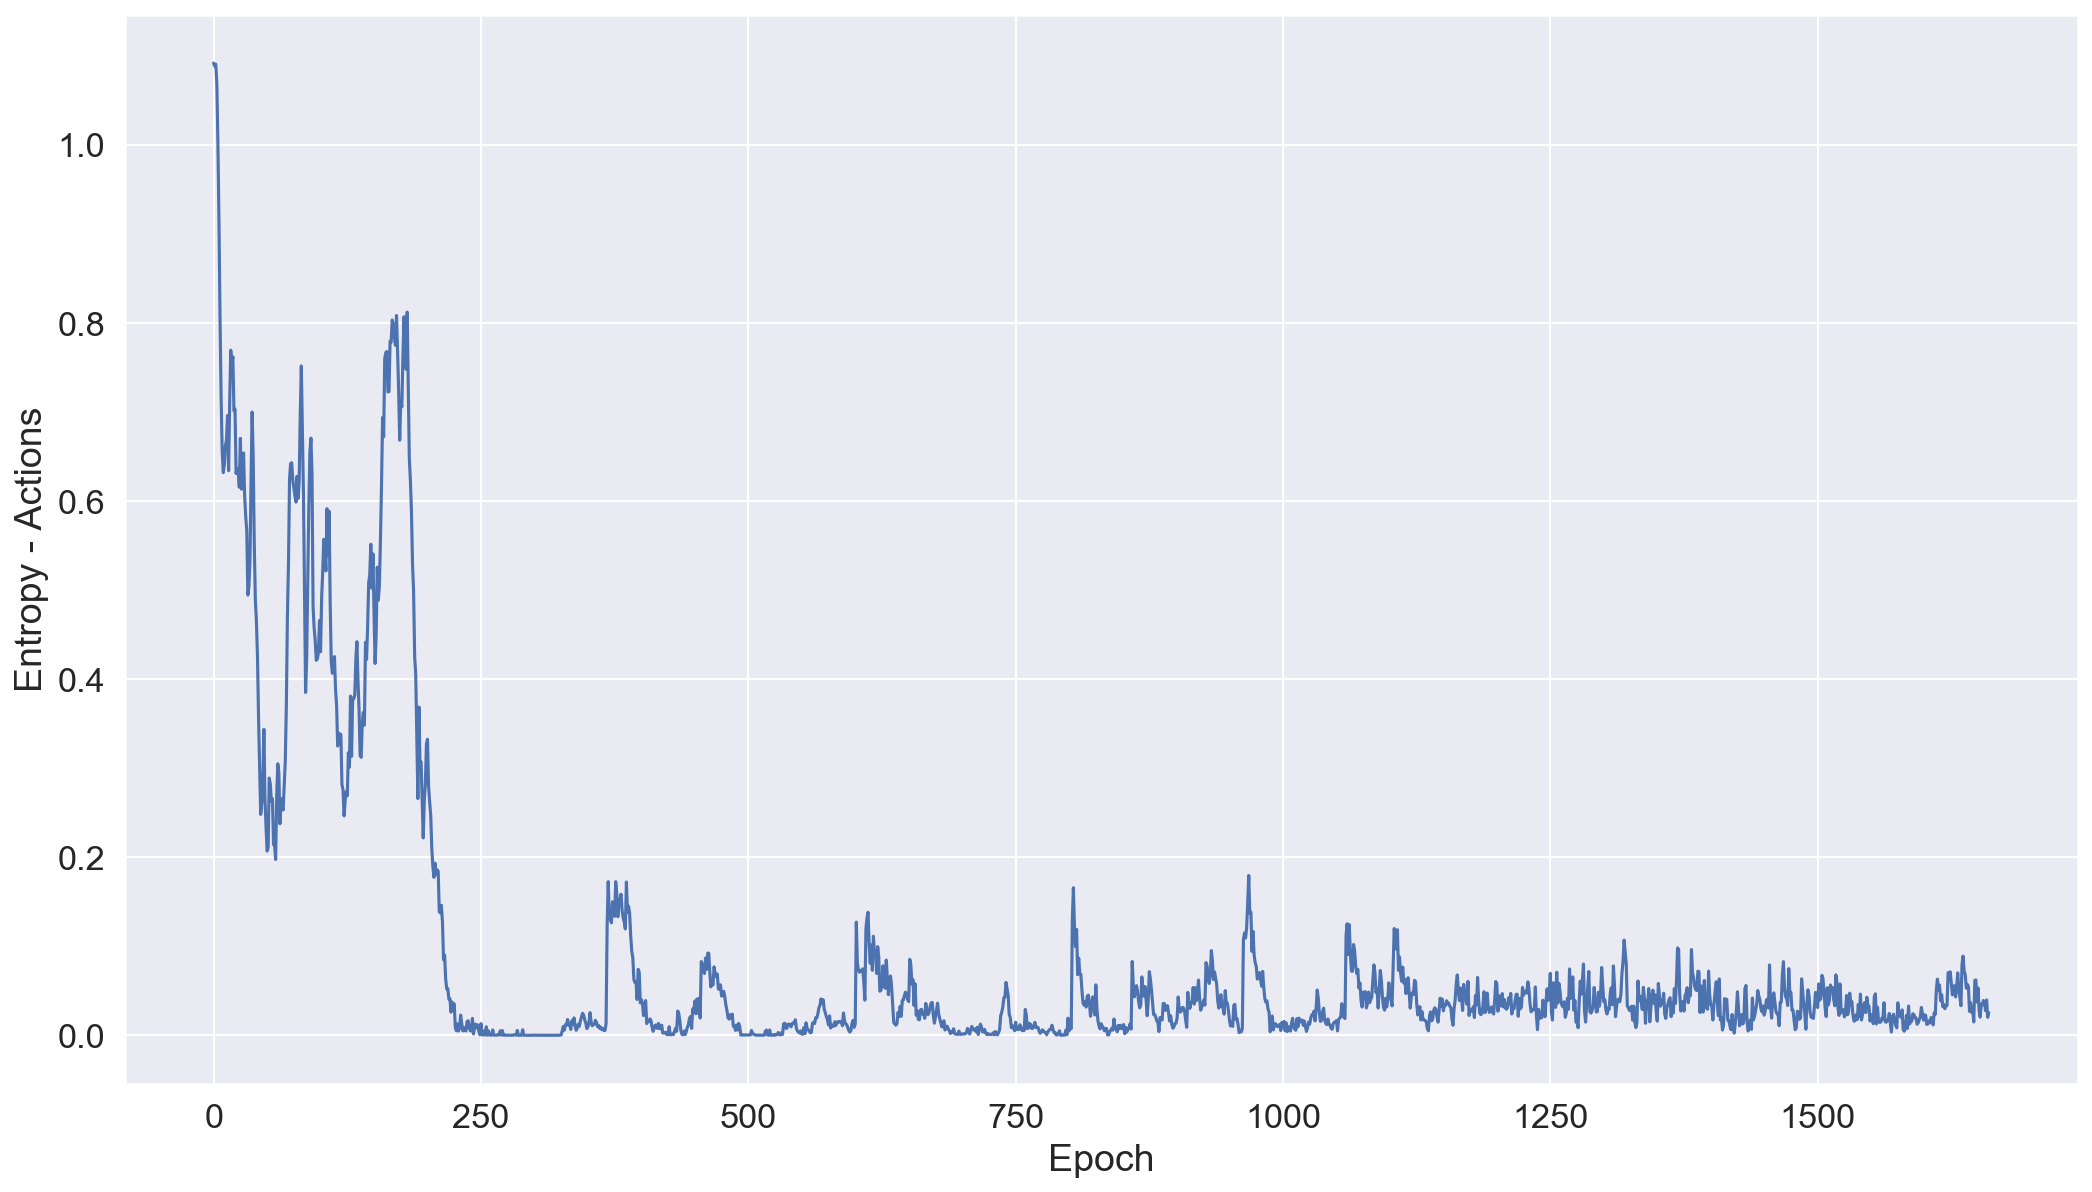

In [27]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='Entropy - Actions', smooth=1, show_legend=False)
plt.show()

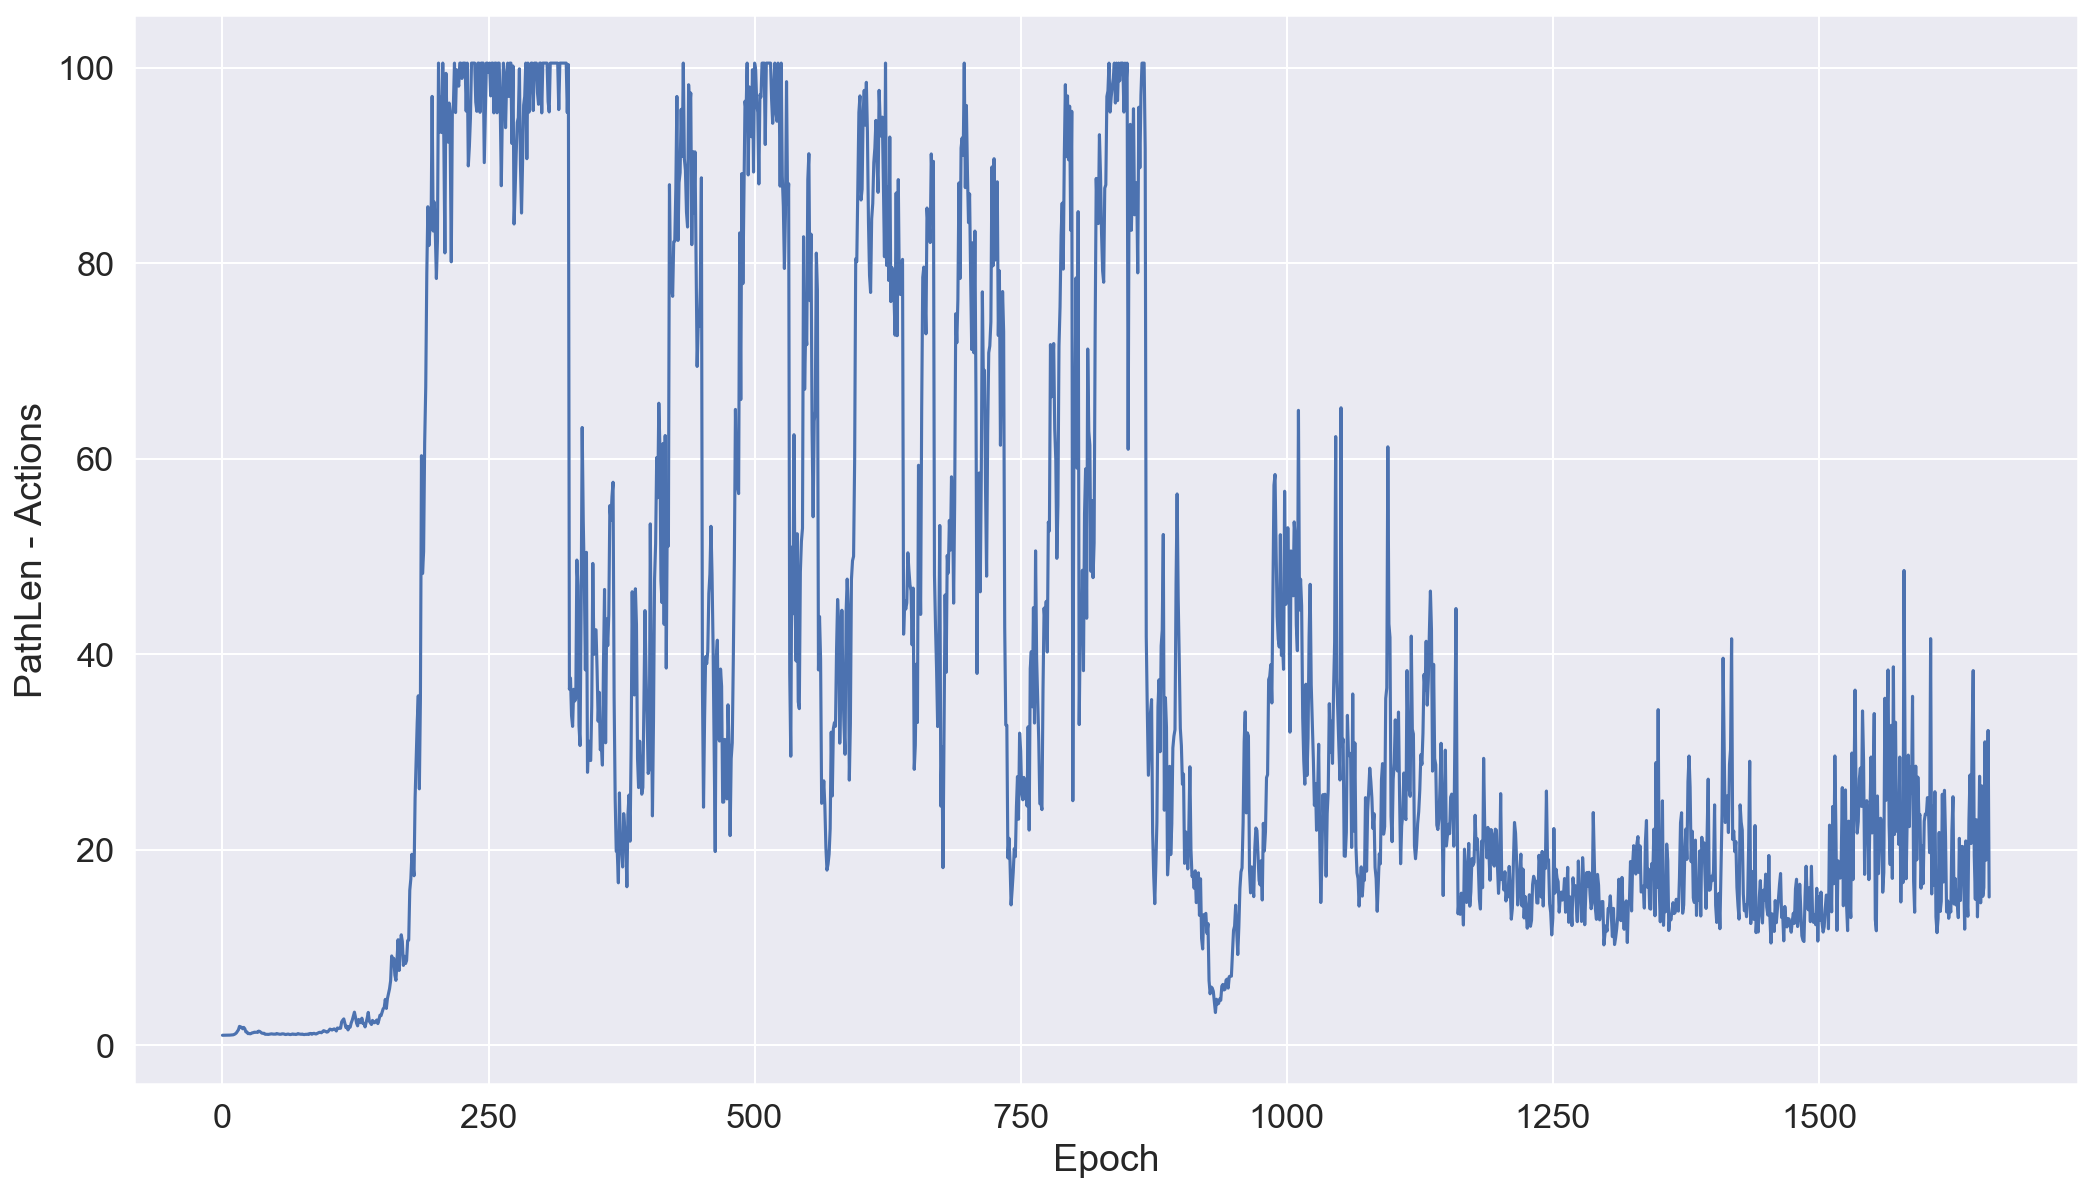

In [28]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='PathLen - Actions', smooth=1, show_legend=False)
plt.show()

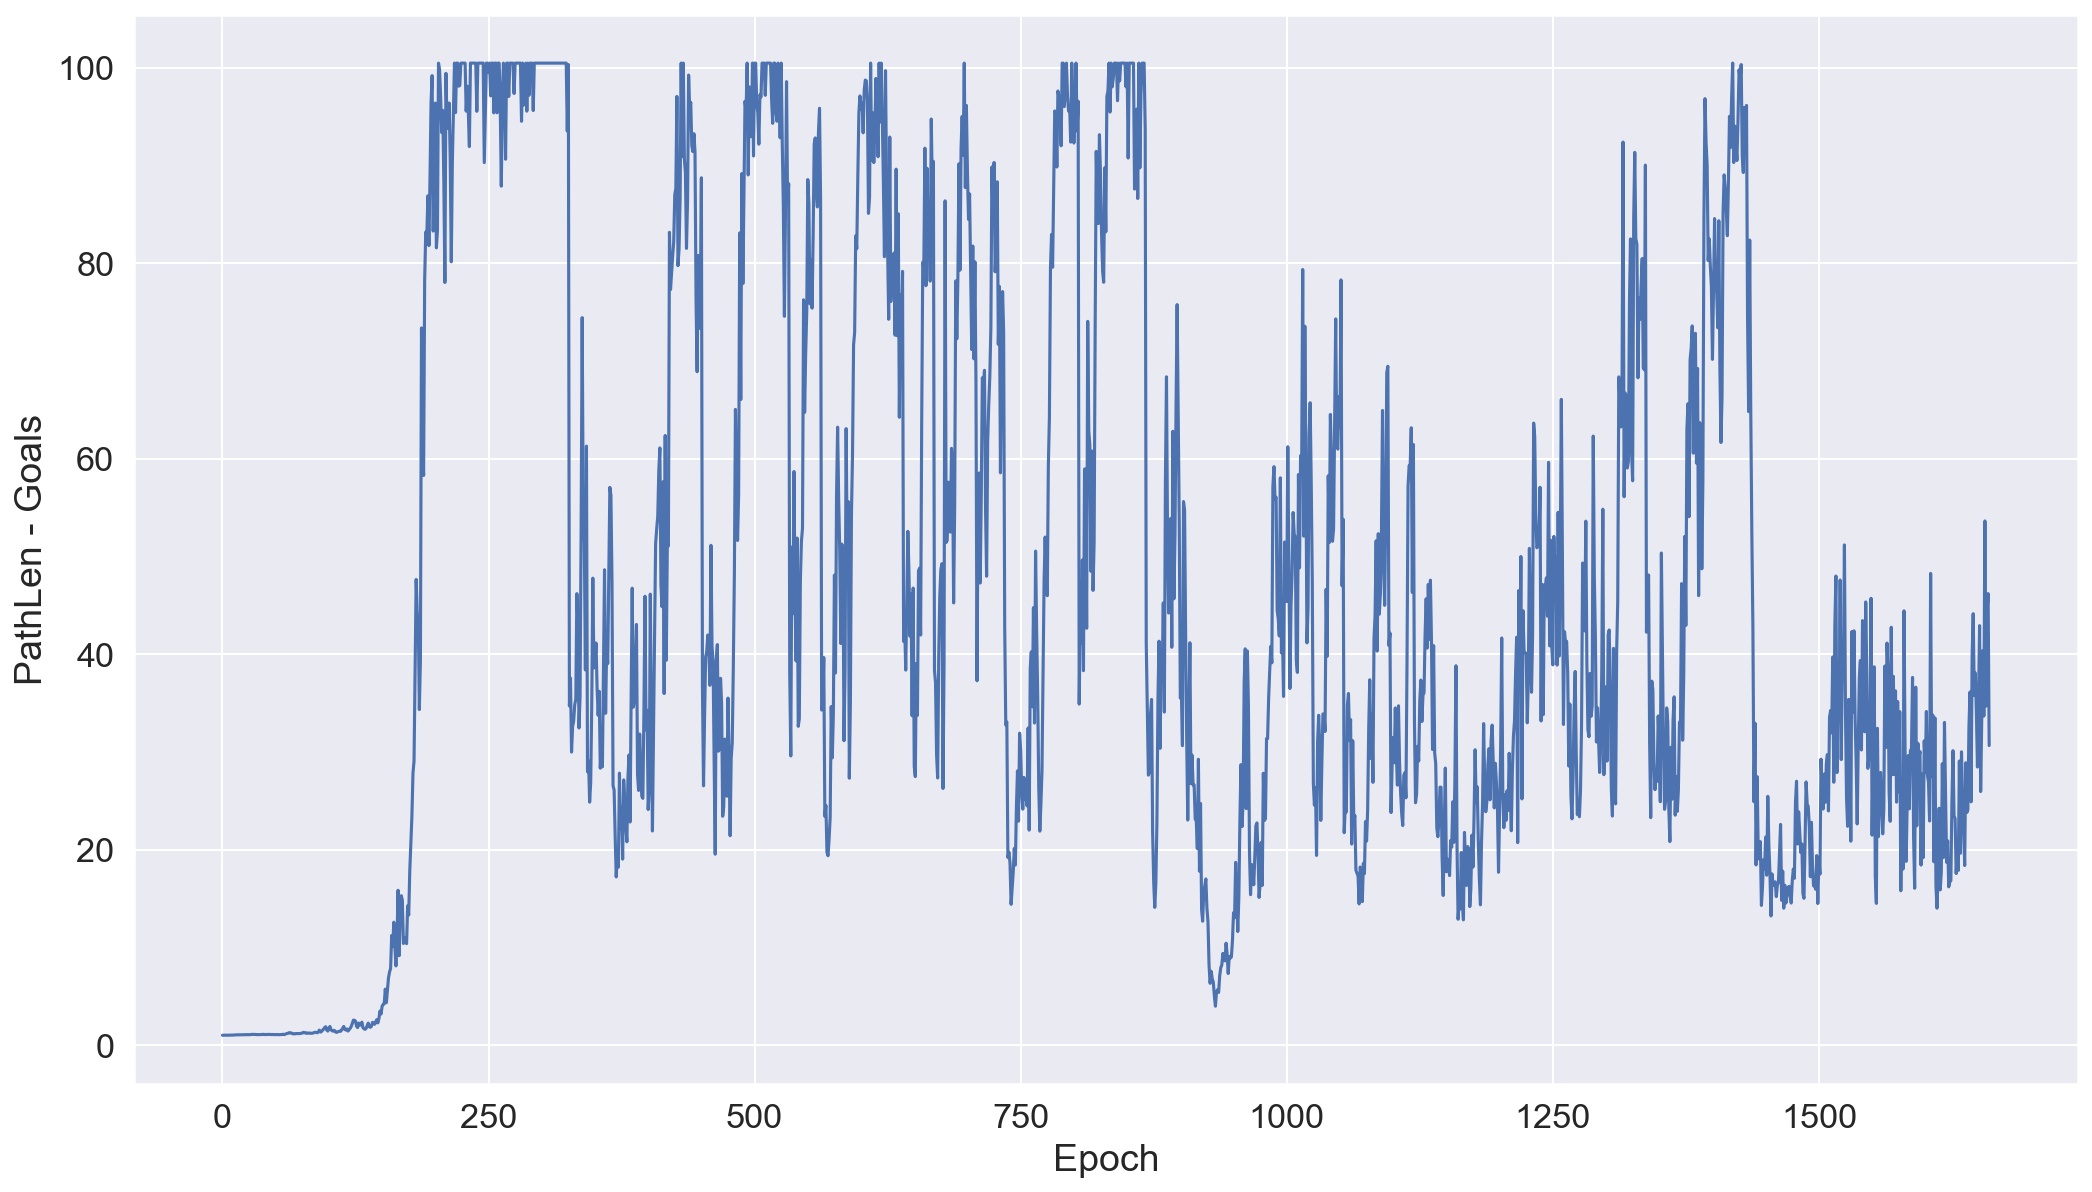

In [29]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='PathLen - Goals', smooth=1, show_legend=False)
plt.show()